In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### EDA

In [4]:
prducts_df = pd.read_csv("./data/products.csv")
aisles_df = pd.read_csv("data/aisles.csv")
departments = pd.read_csv("data/departments.csv")
order_products_prior_df = pd.read_csv('data/order_products__prior.csv')
order_products_train_df = pd.read_csv("data/order_products__train.csv")
orders_df = pd.read_csv("data/orders.csv")

In [5]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
# 用户最后一个订单作为训练集和测试集
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


#### 复购率

In [7]:
order_products_prior_df["add_to_cart_order_mod"] = order_products_prior_df.add_to_cart_order

In [8]:
# 设置加购件数到达70件以上，则表示为70件
order_products_prior_df.add_to_cart_order_mod[order_products_prior_df.add_to_cart_order_mod>70]=70

In [9]:
### 对加购顺序进行groupy并，计算复购率
groupby_df = order_products_prior_df.groupby(by="add_to_cart_order_mod")["reordered"]
groupby_df = groupby_df.aggregate("mean")

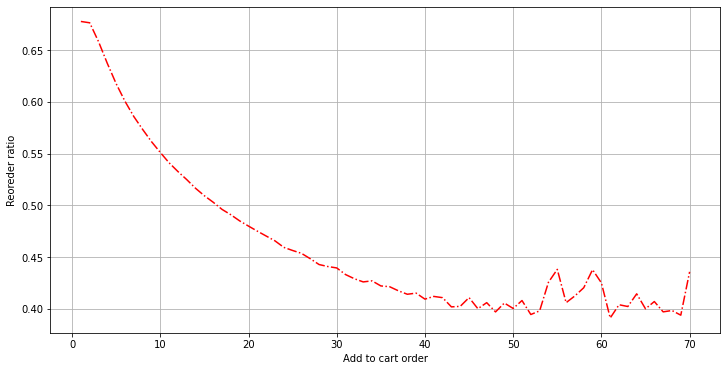

In [10]:
# 构建复购率图
plt.figure(figsize=(12, 6))
groupby_df.plot(c="r", linestyle="dashdot")
plt.ylabel("Reoreder ratio")
plt.xlabel("Add to cart order")
plt.grid()
plt.show()

结论：首先放入加购的商品，再一次购买的可能较大（复购率高），越是后面加购的商品，其再一次购买的可能较少。 

#### 用户订单数量分布趋势

In [11]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [12]:
groupby_df = orders_df.groupby(by="user_id")["order_number"].aggregate(np.max)
groupby_df

user_id
1         11
2         15
3         13
4          6
5          5
          ..
206205     4
206206    68
206207    17
206208    50
206209    14
Name: order_number, Length: 206209, dtype: int64

In [13]:
cnt_srs = groupby_df.reset_index()
cnt_srs

,user_id,order_number
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5
...,...,...
206204,206205,4
206205,206206,68
206206,206207,17
206207,206208,50


In [14]:
# 统计不同订单次数下的购买次数
cnt_srs = cnt_srs.order_number.value_counts()
cnt_srs

4     23986
5     19590
6     16165
7     13850
8     11700
      ...  
94       57
91       56
97       54
98       50
99       47
Name: order_number, Length: 97, dtype: int64

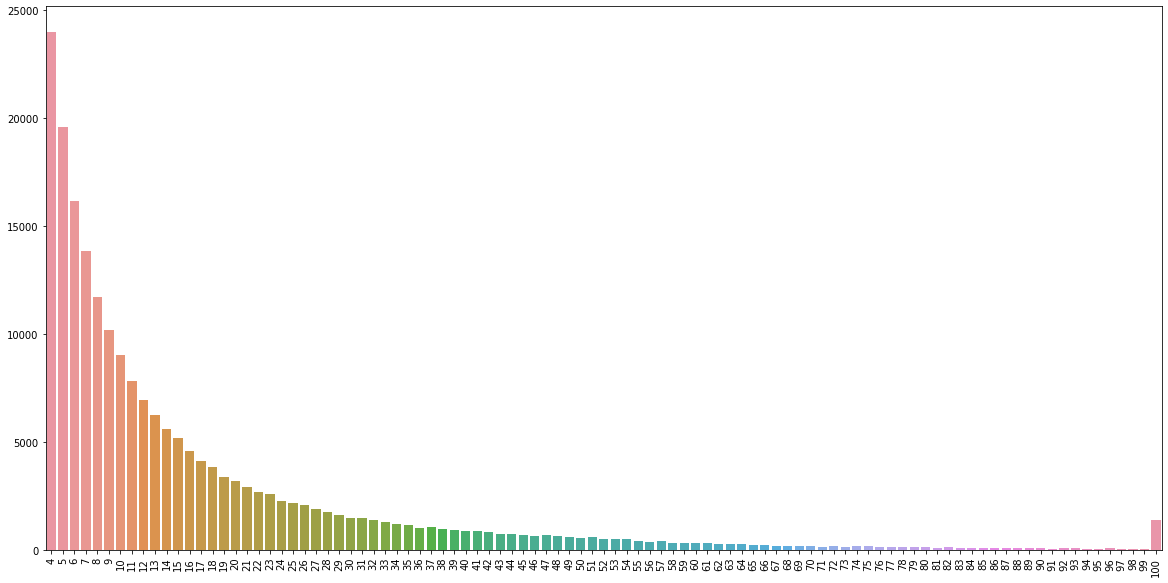

In [15]:
plt.figure(figsize=(20, 10))
sns.barplot(cnt_srs.index, cnt_srs.values)
plt.xticks(rotation="90")
plt.show()

结论：大多数用户趋向较少的订单

#### 分析每一笔订单购买商品数据量的分布情况

In [16]:
group_df = order_products_train_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()

In [17]:
cnt_srs = group_df.add_to_cart_order.value_counts()
cnt_srs

5     8895
6     8708
7     8541
4     8218
3     8033
      ... 
68       2
66       2
67       1
75       1
77       1
Name: add_to_cart_order, Length: 75, dtype: int64

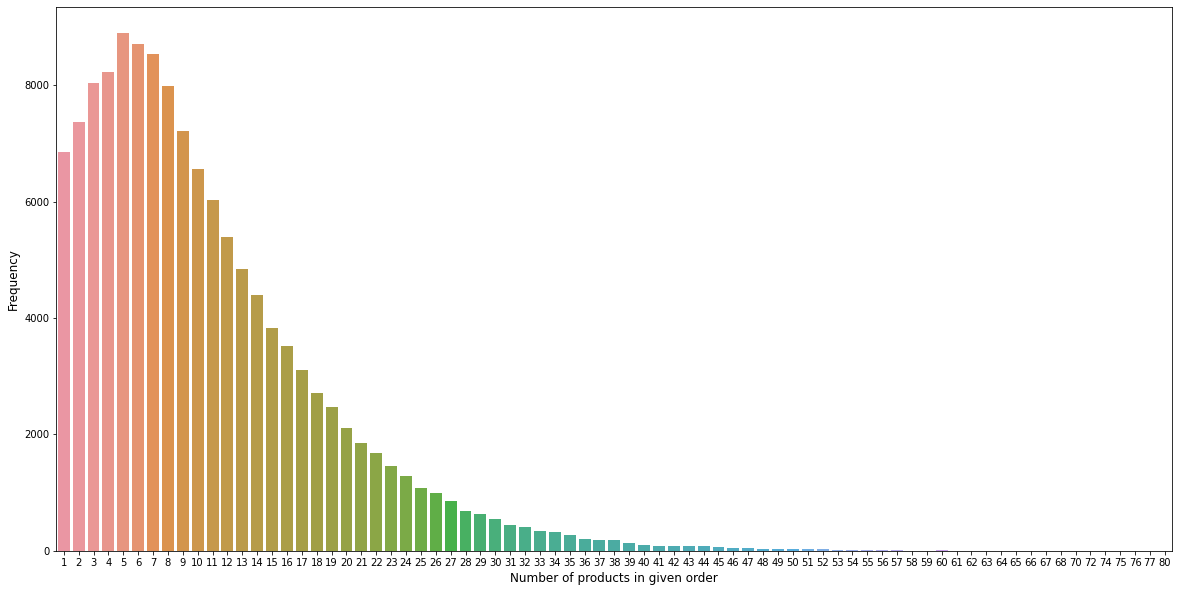

In [18]:
plt.figure(figsize=(20, 10))
sns.barplot(cnt_srs.index, cnt_srs.values)
plt.xlabel("Number of products in given order", fontsize=12)
plt.ylabel("Frequency", fontsize= 12)
plt.show()

结论：从图中可以看出大多数用户的订单内的商品都集中在5个左右

#### 研究用户在不同时间点(一周内)的购物习惯

In [19]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


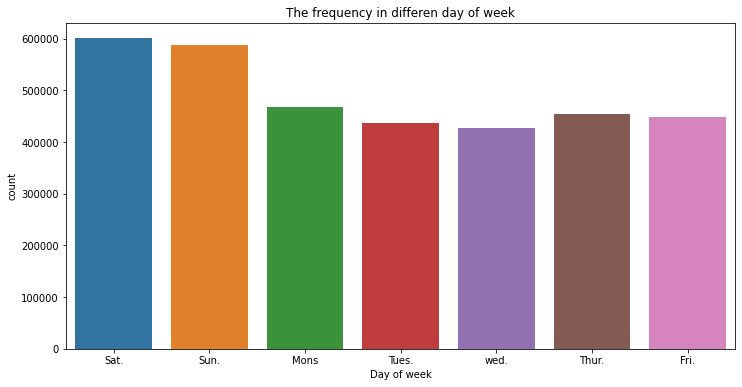

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(x="order_dow", data=orders_df)
plt.xlabel("Day of week")
plt.xticks([i for i in range(7)], ["Sat.", "Sun.", "Mons", "Tues.", "wed.", "Thur.", "Fri."])
plt.title("The frequency in differen day of week")
plt.show()

结论：用户一般习惯集中在周末进行购物，而在周三出现购物的低谷。

#### 研究用户在不同时间点(一天内)的购物习惯

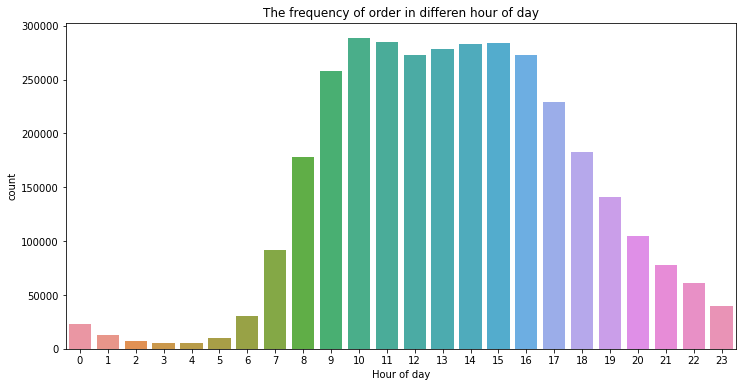

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(x="order_hour_of_day", data=orders_df)
plt.xlabel("Hour of day")
plt.title("The frequency of order in differen hour of day")
plt.show()

结论：大多数用户偏向与在中午和下午进行购物，也即主要是在白天进行购物

In [22]:
# group_df = orders_df.groupby(["order_dow", "order_hour_of_day"])

In [ ]:
####

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x="day_since_prior_order", data=orders_df)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Hour of day", fontsize=12)
plt.show()

In [ ]:
orders_df.columns